<a href="https://www.kaggle.com/code/raxmatillo/pnevmoniya?scriptVersionId=218887184" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from fastai.vision.all import *

path = Path('/kaggle/input/pnevmoniya')
# path.ls()

path.ls()

(#3) [Path('/kaggle/input/pnevmoniya/test'),Path('/kaggle/input/pnevmoniya/train'),Path('/kaggle/input/pnevmoniya/sample_solution.csv')]

In [3]:
PNEUMONIA = (path/'train'/'PNEUMONIA').ls().sorted()
NORMAL = (path/'train'/'NORMAL').ls().sorted()
sample = pd.read_csv(path/'sample_solution.csv')

In [4]:
len(PNEUMONIA), len(NORMAL)

(3875, 1341)

In [5]:
n = len(NORMAL)
PNEUMONIA = PNEUMONIA[:n]
len(PNEUMONIA), len(NORMAL)

(1341, 1341)

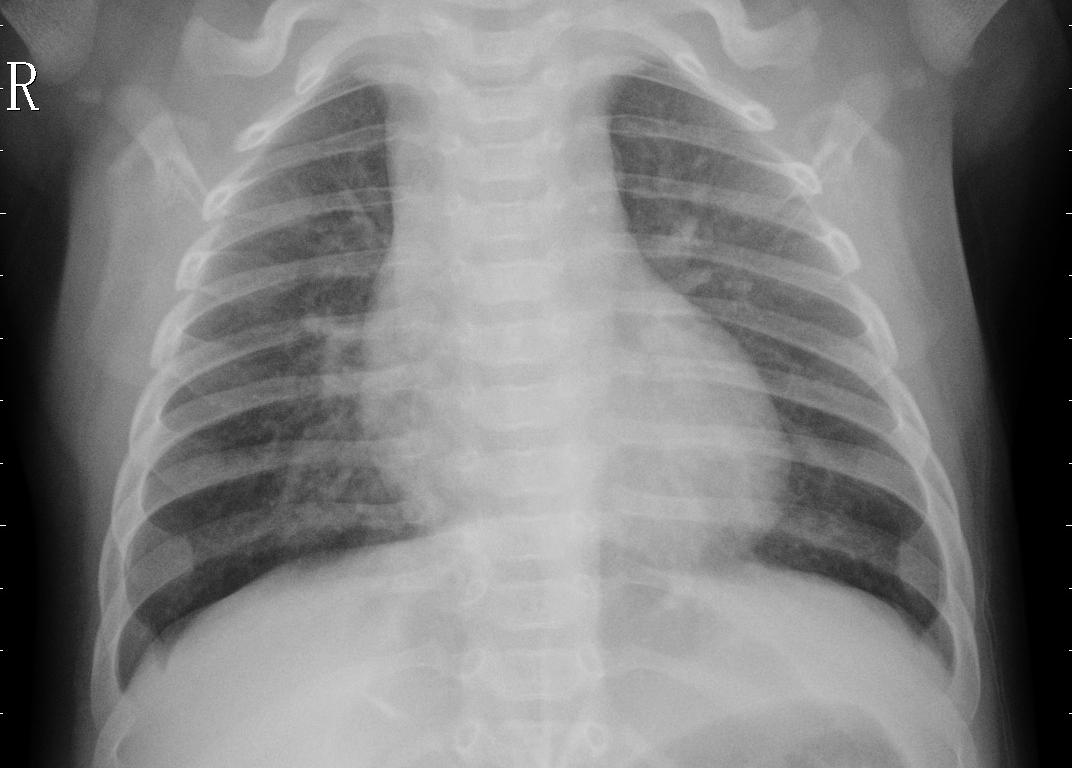

In [6]:
imP_path = PNEUMONIA[1]
imP = Image.open(imP_path)
imP

In [7]:
lungs = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

dls = lungs.dataloaders(path/'train')

learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 186MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.466217,0.177025,0.937680,00:57


epoch,train_loss,valid_loss,accuracy,time
0,0.158075,0.095614,0.976989,00:56
1,0.104693,0.097921,0.969319,00:56
2,0.056591,0.048495,0.982742,00:56
3,0.029437,0.053655,0.982742,00:56


In [8]:
img = PILImage.create(NORMAL[0])
pred, pred_id, probs = learn.predict(img)
print(f'Predict: {pred}')
print(f'Probablity: {probs[pred_id]*100:.1f}')

Predict: NORMAL
Probablity: 100.0


In [9]:
img = PILImage.create(PNEUMONIA[0])
pred, pred_id, probs = learn.predict(img)
print(f'Predict: {pred}')
print(f'Probablity: {probs[pred_id]*100:.1f}')

Predict: PNEUMONIA
Probablity: 100.0


In [10]:
learn.validate()

(#2) [0.05365494638681412,0.9827420711517334]

In [11]:
test_path = Path('/kaggle/input/pnevmoniya/test')

In [12]:
test_path.ls()

(#624) [Path('/kaggle/input/pnevmoniya/test/test_img_10340.jpeg'),Path('/kaggle/input/pnevmoniya/test/test_img_10168.jpeg'),Path('/kaggle/input/pnevmoniya/test/test_img_10613.jpeg'),Path('/kaggle/input/pnevmoniya/test/test_img_10368.jpeg'),Path('/kaggle/input/pnevmoniya/test/test_img_10036.jpeg'),Path('/kaggle/input/pnevmoniya/test/test_img_10527.jpeg'),Path('/kaggle/input/pnevmoniya/test/test_img_10020.jpeg'),Path('/kaggle/input/pnevmoniya/test/test_img_10585.jpeg'),Path('/kaggle/input/pnevmoniya/test/test_img_10276.jpeg'),Path('/kaggle/input/pnevmoniya/test/test_img_10054.jpeg'),Path('/kaggle/input/pnevmoniya/test/test_img_10298.jpeg'),Path('/kaggle/input/pnevmoniya/test/test_img_10355.jpeg'),Path('/kaggle/input/pnevmoniya/test/test_img_10511.jpeg'),Path('/kaggle/input/pnevmoniya/test/test_img_10410.jpeg'),Path('/kaggle/input/pnevmoniya/test/test_img_10096.jpeg'),Path('/kaggle/input/pnevmoniya/test/test_img_10219.jpeg'),Path('/kaggle/input/pnevmoniya/test/test_img_10057.jpeg'),Path('

In [13]:
test_images = sorted(test_path.ls(), key=lambda x: int(x.stem.split('_')[2]))

results = []
for img_name in test_images:
    img_path = os.path.join(test_path, img_name)
    img = PILImage.create(img_path)

    pred, pred_id, probs = learn.predict(img)
    class_ = 0
    if pred == 'PNEUMONIA': class_ = 1
    if pred == 'NORMAL': class_ = 0
    results.append([img_name, class_])

    

In [14]:
df = pd.DataFrame(results, columns=['id', 'labels'])
df.head()

,id,labels
0,/kaggle/input/pnevmoniya/test/test_img_10001.jpeg,1
1,/kaggle/input/pnevmoniya/test/test_img_10002.jpeg,0
2,/kaggle/input/pnevmoniya/test/test_img_10003.jpeg,1
3,/kaggle/input/pnevmoniya/test/test_img_10004.jpeg,1
4,/kaggle/input/pnevmoniya/test/test_img_10005.jpeg,0


In [15]:
df['id'] = df['id'].apply(lambda x: Path(x).name)
df.head()

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,1
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,0


In [16]:
df.shape

(624, 2)

In [17]:
df.to_csv('pneumonia_new.csv',index=False)